# Phylogenetic Analysis using Biopython


# Introduction

In the realm of evolutionary biology and molecular genetics, understanding the evolutionary relationships between species is crucial. Phylogeny, the study of evolutionary relationships among groups of organisms, utilizes phylogenetic trees to visualize and analyze these relationships. Each branch in a phylogenetic tree represents a lineage, with the lengths and patterns of branches indicating the evolutionary distances and relatedness between species.

# What is Phylogeny?

Phylogeny is the evolutionary history and relationships among individuals or groups of organisms, often depicted in a phylogenetic tree. These trees illustrate the divergence of species from common ancestors over time, crucial for understanding biodiversity and evolutionary processes.

# Project Aim

The aim of this project is to construct and analyze a phylogenetic tree to evaluate the evolutionary relationships between pairs of species based on their genetic data, specifically using the cytochrome b gene. By leveraging Biopython and various computational methods, this project serves as a practical exercise to enhance my skills in bioinformatics and evolutionary biology.

# Phylogenetic Analysis Techniques

For this project, I have employed methods for constructing phylogenetic trees using distance matrices derived from genetic data. By analyzing the resulting tree, I aim to evaluate the evolutionary closeness between different species. The project highlights the importance of phylogenetic analysis in understanding species relationships and evolutionary processes.

First of all, I am going to install the necessary biopython library.

In [ ]:
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 26.4 MB/s eta 0:00:00


# Using Entrez search to find sequences of cytochrome b gene of different species.

This gene is commonly used in determination of evolutionary changes in different species. Here, I have chosen 25 species.
Entrez search engine is a widely popular tool that is used for extracting key information like DNA or protein sequences from the NCBI website.

In [ ]:
from Bio import Entrez, SeqIO

Entrez.email = "shikhar.agrahari.bce23@itbhu.ac.in"

accessions = {
    "Human": "NC_012920",
    "Chimpanzee": "NC_001643",
    "Gorilla": "NC_001645",
    "Orangutan": "AY135631",
    "Rhesus_Macaque": "NC_005358",
    "Horse": "NC_001640",
    "Blue_Whale": "NC_001601",
    "African_Elephant": "NC_000934",
    "Chicken": "NC_001323",
    "Bald_Eagle": "NC_024022",
    "Emu": "NC_012774",
    "Peregrine_Falcon": "NC_011818",
    "Green_Anole_Lizard": "NC_010972",
    "Saltwater_Crocodile": "NC_008160",
    "Komodo_Dragon": "NC_012573",
    "African_Clawed_Frog": "NC_001573",
    "Salamander": "NC_015352",
    "Zebrafish": "NC_002333",
    "Coelacanth": "NC_001804",
    "Clownfish": "NC_016993",
    "Great_White_Shark": "NC_006951",
    "Drosophila": "NC_024511",
    "Honeybee": "NC_001566",
    "Octopus": "NC_006353",
    "Sea_Urchin": "NC_001572",
}

def fetch_sequences(accessions):
    sequences = {}
    for species, accession in accessions.items():
        handle = Entrez.efetch(db="nucleotide", id=accession, rettype="fasta", retmode="text")
        record = SeqIO.read(handle, "fasta")
        handle.close()
        sequences[species] = record.seq
    return sequences

species_sequences = fetch_sequences(accessions)

for species, sequence in species_sequences.items():
    print(f"{species} Cytochrome b Sequence: {sequence}")

Human Cytochrome b Sequence: GATCACAGGTCTATCACCCTATTAACCACTCACGGGAGCTCTCCATGCATTTGGTATTTTCGTCTGGGGGGTATGCACGCGATAGCATTGCGAGACGCTGGAGCCGGAGCACCCTATGTCGCAGTATCTGTCTTTGATTCCTGCCTCATCCTATTATTTATCGCACCTACGTTCAATATTACAGGCGAACATACTTACTAAAGTGTGTTAATTAATTAATGCTTGTAGGACATAATAATAACAATTGAATGTCTGCACAGCCACTTTCCACACAGACATCATAACAAAAAATTTCCACCAAACCCCCCCTCCCCCGCTTCTGGCCACAGCACTTAAACACATCTCTGCCAAACCCCAAAAACAAAGAACCCTAACACCAGCCTAACCAGATTTCAAATTTTATCTTTTGGCGGTATGCACTTTTAACAGTCACCCCCCAACTAACACATTATTTTCCCCTCCCACTCCCATACTACTAATCTCATCAATACAACCCCCGCCCATCCTACCCAGCACACACACACCGCTGCTAACCCCATACCCCGAACCAACCAAACCCCAAAGACACCCCCCACAGTTTATGTAGCTTACCTCCTCAAAGCAATACACTGAAAATGTTTAGACGGGCTCACATCACCCCATAAACAAATAGGTTTGGTCCTAGCCTTTCTATTAGCTCTTAGTAAGATTACACATGCAAGCATCCCCGTTCCAGTGAGTTCACCCTCTAAATCACCACGATCAAAAGGAACAAGCATCAAGCACGCAGCAATGCAGCTCAAAACGCTTAGCCTAGCCACACCCCCACGGGAAACAGCAGTGATTAACCTTTAGCAATAAACGAAAGTTTAACTAAGCTATACTAACCCCAGGGTTGGTCAATTTCGTGCCAGCCACCGCGGTCACACGATTAACCCAAGTCAATAGAAGCCGGCGTAAAGAGTGTTTTAGATCACCCCCTCCCCAATAAA

# Installing CLUSTALW tool to align the given sequences
I am using this tool so that sequences can be aligned before constructing the phylogenetic tree. This is because sequence alignment is a critical preprocessing step in phylogenetic analysis, ensuring that the resulting tree accurately represents the evolutionary relationships among the studied species.

In [ ]:
!apt-get install clustalw

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  clustalx seaview
The following NEW packages will be installed:
  clustalw
0 upgraded, 1 newly installed, 0 to remove and 22 not upgraded.
Need to get 275 kB of archives.
After this operation, 818 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 clustalw amd64 2.1+lgpl-7 [275 kB]
Fetched 275 kB in 1s (312 kB/s)
Selecting previously unselected package clustalw.
(Reading database ... 124935 files and directories currently installed.)
Preparing to unpack .../clustalw_2.1+lgpl-7_amd64.deb ...
Unpacking clustalw (2.1+lgpl-7) ...
Setting up clustalw (2.1+lgpl-7) ...
Processing triggers for man-db (2.10.2-1) ...


Importing necessary tools for the phylogenetic tree construction.

In [ ]:
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor

# Padding sequences to be of equal length, multiple sequence alignment, and construction of the phylogenetic tree

In [ ]:
max_length = max(len(str(seq)) for seq in species_sequences)
padded_sequences = [SeqRecord((str(seq).ljust(max_length, 'N')), description="")
                     for seq in species_sequences]

for i, seq in enumerate(padded_sequences):
    seq.id = f"seq_{i+1}"

alignment = MultipleSeqAlignment((padded_sequences))

calculator = DistanceCalculator('identity')
dm = calculator.get_distance(alignment)

constructor = DistanceTreeConstructor()
tree = constructor.upgma(dm)

/usr/local/lib/python3.11/dist-packages/Bio/SeqRecord.py:228: BiopythonDeprecationWarning: Using a string as the sequence is deprecated and will raise a TypeError in future. It has been converted to a Seq object.
  warnings.warn(


# Visualization and saving the prepared phylogenetic tree in newick format

In [ ]:
from Bio import Phylo
Phylo.draw_ascii(tree)

Phylo.write(tree, "phylogenetic_tree.nwk", "newick")
print("Phylogenetic tree saved as phylogenetic_tree.nwk")

  __________________________________________________________________ seq_14
 |
 |                              ____________________________________ seq_16
_|    _________________________|
 |   |                         |____________________________________ seq_8
 |   |
 |___|                  ____________________________________________ seq_21
     | ________________|
     ||                |____________________________________________ seq_13
     ||
      |   __________________________________________________________ seq_12
      |  |
      |__|         _________________________________________________ seq_5
         |        |
         |________|   ______________________________________________ seq_15
                  |  |
                  |  |                ______________________________ seq_22
                  |__|          _____|
                     |         |     |         _____________________ seq_10
                     |         |     |________|
                     |   

# Visualization of the phylogenetic tree through matplotlib

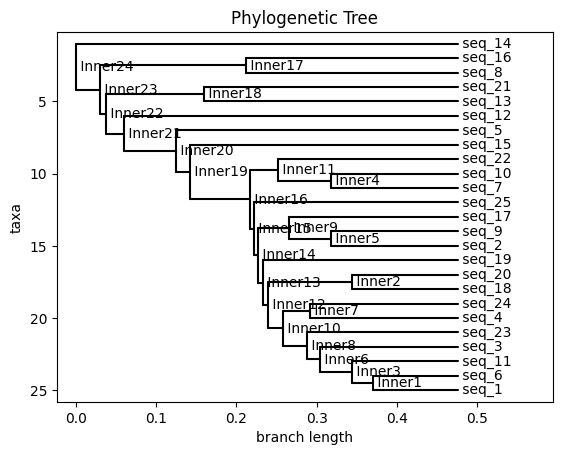

In [ ]:
import matplotlib.pyplot as plt

Phylo.draw(tree, do_show=False)
plt.title("Phylogenetic Tree")
plt.show()

# Calculating species pair distances & the closest relatives using itertools

The itertools.combinations function allows us to create all unique pairs of species from the list of terminal nodes without repetition. This is essential for calculating distances between each pair without needing to handle duplicates or self-comparisons (i.e., a species compared to itself).

Distance here signifies evolutionary closeness, and therefore the species pair with the least value of the distance is considered as the closest relative pair.

In [ ]:
from itertools import combinations

terminals = tree.get_terminals()

min_distance = float("inf")
closest_pair = None

for sp1, sp2 in combinations(terminals, 2):
    distance = tree.distance(sp1, sp2)
    print(f"Species pair: {sp1.name} and {sp2.name}, Distance: {distance}")

    if distance < min_distance:
        min_distance = distance
        closest_pair = (sp1.name, sp2.name)

print(f"\nClosest relatives: {closest_pair[0]} and {closest_pair[1]}")
print(f"Distance between them: {min_distance}")

Species pair: seq_14 and seq_16, Distance: 0.9509919819078947
Species pair: seq_14 and seq_8, Distance: 0.9509919819078947
Species pair: seq_14 and seq_21, Distance: 0.9509919819078947
Species pair: seq_14 and seq_13, Distance: 0.9509919819078947
Species pair: seq_14 and seq_12, Distance: 0.9509919819078947
Species pair: seq_14 and seq_5, Distance: 0.9509919819078947
Species pair: seq_14 and seq_15, Distance: 0.9509919819078947
Species pair: seq_14 and seq_22, Distance: 0.9509919819078947
Species pair: seq_14 and seq_10, Distance: 0.9509919819078947
Species pair: seq_14 and seq_7, Distance: 0.9509919819078947
Species pair: seq_14 and seq_25, Distance: 0.9509919819078947
Species pair: seq_14 and seq_17, Distance: 0.9509919819078947
Species pair: seq_14 and seq_9, Distance: 0.9509919819078947
Species pair: seq_14 and seq_2, Distance: 0.9509919819078947
Species pair: seq_14 and seq_19, Distance: 0.9509919819078947
Species pair: seq_14 and seq_20, Distance: 0.9509919819078947
Species pair:

# Finding out the branch lengths

In a phylogenetic tree, a branch length represents the evolutionary distance between species or groups of species.

In [ ]:
for clade in tree.find_clades():
    if clade.branch_length:
        print(f"Clade: {clade.name}, Branch Length: {clade.branch_length}")

Clade: seq_14, Branch Length: 0.47549599095394735
Clade: Inner23, Branch Length: 0.030146548622532854
Clade: Inner17, Branch Length: 0.18219154759457235
Clade: seq_16, Branch Length: 0.26315789473684215
Clade: seq_8, Branch Length: 0.26315789473684215
Clade: Inner22, Branch Length: 0.006901791221217091
Clade: Inner18, Branch Length: 0.12265817742598689
Clade: seq_21, Branch Length: 0.3157894736842105
Clade: seq_13, Branch Length: 0.3157894736842105
Clade: Inner21, Branch Length: 0.02297813013980271
Clade: seq_12, Branch Length: 0.4154695209703947
Clade: Inner20, Branch Length: 0.06515342310855254
Clade: seq_5, Branch Length: 0.35031609786184215
Clade: Inner19, Branch Length: 0.0169998972039474
Clade: seq_15, Branch Length: 0.33331620065789475
Clade: Inner16, Branch Length: 0.07457853618421051
Clade: Inner11, Branch Length: 0.035053453947368446
Clade: seq_22, Branch Length: 0.2236842105263158
Clade: Inner4, Branch Length: 0.06578947368421054
Clade: seq_10, Branch Length: 0.1578947368421

# Calculation of monophylogenetic clades

A monophyletic clade is a group of organisms that includes an ancestor and all of its descendants, forming a complete branch on the tree of life. This concept is crucial for understanding evolutionary relationships, as monophyletic clades reflect true evolutionary lineages.

In [ ]:
for clade in tree.find_clades():

    if clade.is_terminal():
        continue
    terminals = [term.name for term in clade.get_terminals()]
    print(f"Clade with species: {terminals}")

Clade with species: ['seq_14', 'seq_16', 'seq_8', 'seq_21', 'seq_13', 'seq_12', 'seq_5', 'seq_15', 'seq_22', 'seq_10', 'seq_7', 'seq_25', 'seq_17', 'seq_9', 'seq_2', 'seq_19', 'seq_20', 'seq_18', 'seq_24', 'seq_4', 'seq_23', 'seq_3', 'seq_11', 'seq_6', 'seq_1']
Clade with species: ['seq_16', 'seq_8', 'seq_21', 'seq_13', 'seq_12', 'seq_5', 'seq_15', 'seq_22', 'seq_10', 'seq_7', 'seq_25', 'seq_17', 'seq_9', 'seq_2', 'seq_19', 'seq_20', 'seq_18', 'seq_24', 'seq_4', 'seq_23', 'seq_3', 'seq_11', 'seq_6', 'seq_1']
Clade with species: ['seq_16', 'seq_8']
Clade with species: ['seq_21', 'seq_13', 'seq_12', 'seq_5', 'seq_15', 'seq_22', 'seq_10', 'seq_7', 'seq_25', 'seq_17', 'seq_9', 'seq_2', 'seq_19', 'seq_20', 'seq_18', 'seq_24', 'seq_4', 'seq_23', 'seq_3', 'seq_11', 'seq_6', 'seq_1']
Clade with species: ['seq_21', 'seq_13']
Clade with species: ['seq_12', 'seq_5', 'seq_15', 'seq_22', 'seq_10', 'seq_7', 'seq_25', 'seq_17', 'seq_9', 'seq_2', 'seq_19', 'seq_20', 'seq_18', 'seq_24', 'seq_4', 'seq_2

So, by constructing a phylogenetic tree, calculating pairwise distances, branch lengths, finding out the closest relatives on the basis of the cytochrome b gene, and identifying monophyletic clades, I have gained practical experience in applying theoretical knowledge and exploring the capabilities of Biopython. It is worth noting that several features were left out due to memory limitations, yet this will not deter me from pursuing more complex and in-depth analyses in the future. I welcome any feedback on this work, as it will help me grow and refine my skills further.

Thank you!!!